# 과제: MNIST 데이터를 나만의 NN model로 95 % 이상의 성능으로 training 시켜보자!


## Loading MNIST training data

출처: 19기 DS 정은서님

In [61]:
import tensorflow as tf
from tensorflow import keras

# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scaling(image data는 min-max scaling 주로 사용)
x_train = x_train/255.0
x_test = x_test/255.0

## Training Data
28 * 28 pixel 값을 가진 총 60000개의 이미지 데이터

In [62]:
x_train.shape 

(60000, 28, 28)

Neural network 모델에 맞게 이미지 데이터를 벡터 형태로 데이터를 reshape 합니다.  
(Model을 만들 때 *keras.layers.Flatten(input_shape=(28, 28)) 이용해도 됨)

In [63]:
x_train, x_test = x_train.reshape((-1, 28*28)), x_test.reshape((-1, 28*28))
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

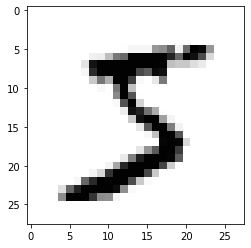

In [64]:
# Hint: x_train[0].reshape()
plt.imshow(x_train[0].reshape((28,28))).set_cmap('Greys')

## Training Labels
이미지 데이터가 나타내는 숫자값을 label로 가지고 있고, 0부터 9까지의 값을 나타냄  
마찬가지로, 60000개의 label이 존재

In [65]:
y_train.shape

(60000,)

In [66]:
# show MNIST label for above data
y_train[0]

5

## 나만의 모델을 tensorflow keras API 를 이용해 만들어 봅시다~

* parameters for model

In [67]:
activation_list = ["sigmoid", "relu", "softmax", "tanh"]

loss_list = ["sparse_categorical_crossentropy",
             "categorical_crossentropy", 
             "binary_crossentropy"]

optimizer_list = ["sgd", "adam", "rmsprop", "adagrad"]

initializer_list = [tf.keras.initializers.RandomNormal(), 
                    tf.keras.initializers.RandomUniform(), 
                    tf.keras.initializers.he_normal(), 
                    tf.keras.initializers.he_uniform(), 
                    tf.keras.initializers.GlorotUniform(),
                    tf.keras.initializers.GlorotNormal()]

# dropout
dropout_rate = 0.3
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation = "sigmoid"),
    tf.keras.layers.Dense(2, activation = "sigmoid"),
    tf.keras.layers.Dropout(dropout_rate)
])


# regularizer
regularizer = tf.keras.regularizers.l1(1e-3)
regularizer = tf.keras.regularizers.l2(1e-3)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          activity_regularizer=regularizer)
])

# weight initialization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          kernel_initializer=initializer_list[0])
])

#### My Own Model 

In [68]:
#### 자유롭게 Model을 만들고 compile 해봅시다 ####
# Initalizer -> Activiation -> Dropout -> Activation -> Regularization -> Activation 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid", kernel_initializer=initializer_list[0]),
    
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(64, activation = "tanh"),
    tf.keras.layers.Dense(32, activation="sigmoid", activity_regularizer=regularizer),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# Model Complie 
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

내가 만든 모델을 확인해 봅시다.

In [69]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 256)               200960    
                                                                 
 dense_52 (Dense)            (None, 128)               32896     
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_53 (Dense)            (None, 64)                8256      
                                                                 
 dense_54 (Dense)            (None, 32)                2080      
                                                                 
 dense_55 (Dense)            (None, 10)                330       
                                                                 
Total params: 244,522
Trainable params: 244,522
Non-t

model을 자유롭게 train 해봅시다.  

In [70]:
model.fit(x_train,y_train,epochs=14)

Epoch 1/14
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5269 - accuracy: 0.8617
Epoch 2/14
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1976 - accuracy: 0.9490
Epoch 3/14
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1415 - accuracy: 0.9632
Epoch 4/14
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1100 - accuracy: 0.9724
Epoch 5/14
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0918 - accuracy: 0.9765
Epoch 6/14
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0768 - accuracy: 0.9812
Epoch 7/14
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0643 - accuracy: 0.9843
Epoch 8/14
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0537 - accuracy: 0.9874
Epoch 9/14
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0488 - accuracy: 0.9887
Epoch 10/14
1875/1875 [==============================] - 5s 3ms/step - loss: 0.042

94%이상의 성능을 가진 모델을 만들면 완성!

In [71]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

print('\nAccuracy:', test_acc)

313/313 - 1s - loss: 0.0870 - accuracy: 0.9803 - 732ms/epoch - 2ms/step

Accuracy: 0.9803000092506409


![](https://www.tensorflow.org/versions/master/images/mnist_tensorboard.png)